In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
consumer_price=pd.read_csv("data/new/Consumer_price_index.csv",encoding="utf-8")
consumer_price.head()

,date,Consumer price index
0,2015-01-01,94.643
1,2015-02-01,94.587
2,2015-03-01,94.596
3,2015-04-01,94.625
4,2015-05-01,94.890


In [3]:
consumer_price.shape

(112, 2)

In [10]:
consumer_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  112 non-null    datetime64[ns]
 1   Consumer price index  112 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [5]:
consumer_price.describe()

,Consumer price index
count,112.000000
mean,101.415295
std,5.693161
min,94.587000
25%,97.484750
50%,99.565000
75%,104.242500
max,113.990000


In [6]:
consumer_price.dtypes

date                     object
Consumer price index    float64
dtype: object

In [7]:
#날짜 형식 변경
consumer_price['date'] = pd.to_datetime(consumer_price['date'])

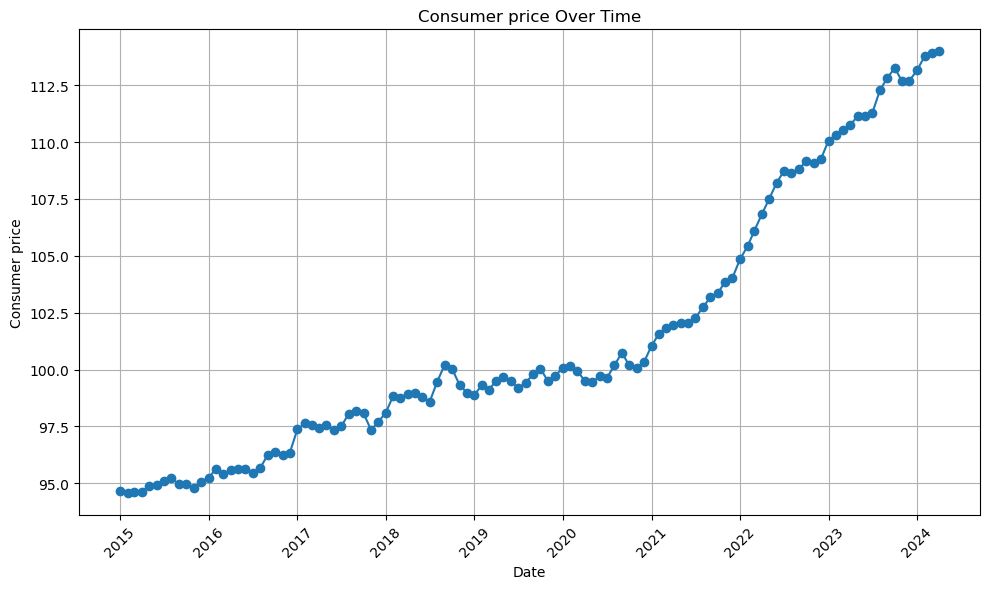

In [8]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(consumer_price['date'],consumer_price['Consumer price index'], marker='o', linestyle='-')

# 그래프 제목 및 축 레이블
plt.title('Consumer price Over Time')
plt.xlabel('Date')
plt.ylabel('Consumer price')

# x 축 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
#전반적인 증가 경향

In [11]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
consumer_price.set_index('date', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
consumer_price = consumer_price.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
consumer_price.reset_index(inplace=True)
consumer_price['date'] = consumer_price['date'].dt.strftime('%Y-%m-%d')

# 결과 출력
consumer_price

,date,Consumer price index
0,2015-01-01,94.643
1,2015-01-02,94.643
2,2015-01-03,94.643
3,2015-01-04,94.643
4,2015-01-05,94.643
...,...,...
3374,2024-03-28,113.940
3375,2024-03-29,113.940
3376,2024-03-30,113.940
3377,2024-03-31,113.940


In [12]:
consumer_price.to_csv('Consumer_price_cleaned.csv',index=False)